<a href="https://colab.research.google.com/github/zhujunqing1996/2021-TAMU-datathon/blob/main/ENVIRONMENT_DATA_ATLAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn import metrics

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/zhujunqing1996/2021-TAMU-datathon/main/DATASET_atlas_top20%20countries.csv')

In [ ]:
df.head()

,Dataset,Path,Country,Country ISO Code,Topic,Subtopic,Indicator,Description,Source,Uri,Year,Month,Unit,Date,Value
0,EDGARED2019,location=AU;indicator=KN.F1;type=All;Frequency=A,Australia,AU,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/Australia/CO2-emissions,1970,1,Mton CO2,1970-01-01,160.99138
1,EDGARED2019,location=AU;indicator=KN.F1;type=All;Frequency=A,Australia,AU,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/Australia/CO2-emissions,1971,1,Mton CO2,1971-01-01,162.29580
2,EDGARED2019,location=AU;indicator=KN.F1;type=All;Frequency=A,Australia,AU,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/Australia/CO2-emissions,1972,1,Mton CO2,1972-01-01,168.19456
3,EDGARED2019,location=AU;indicator=KN.F1;type=All;Frequency=A,Australia,AU,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/Australia/CO2-emissions,1973,1,Mton CO2,1973-01-01,177.85194
4,EDGARED2019,location=AU;indicator=KN.F1;type=All;Frequency=A,Australia,AU,Environment,NaN,CO2 emissions,Carbon dioxide emissions are those stemming fr...,EDGAR,https://knoema.com/atlas/Australia/CO2-emissions,1974,1,Mton CO2,1974-01-01,187.06051


In [ ]:
# No 1: WB mt CO2 from gas solid liquid fuel
Indicator1 = ['CO2 emissions from gaseous fuel consumption', 'CO2 emissions from liquid fuel consumption', 'CO2 emissions from solid fuel consumption']
df_filter1 = df[(df['Dataset'] == 'WBWDI2019Jan') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator1))]
print('The unit of the values are: {}, and needs to be changed into Mt.'.format(df_filter1['Unit'].unique()[0]))
df_1 = pd.crosstab(df_filter1.Year, df_filter1.Indicator, values = df_filter1.Value/1000, aggfunc = 'sum')
df_1['Total CO2 (Mt) from WBWDI2019Jan'] = df_1.sum(axis = 1)
df_1.reset_index(inplace = True)
df_1.head()

The unit of the values are: kt, and needs to be changed into Mt.


Indicator,Year,CO2 emissions from gaseous fuel consumption,CO2 emissions from liquid fuel consumption,CO2 emissions from solid fuel consumption,Total CO2 (Mt) from WBWDI2019Jan
0,1970,1542.809576,4364.760427,4313.675450,10221.245453
1,1971,1643.868429,4628.894437,4332.127794,10604.890660
2,1972,1711.238553,5007.354506,4406.274534,11124.867593
3,1973,1742.778420,5355.411478,4535.756304,11633.946202
4,1974,1743.863852,5348.642196,4525.562044,11618.068092


In [ ]:
# No 2: EDG mt CO2
Indicator2 = ['CO2 emissions']
df_filter2 = df[(df['Dataset'] == 'EDGARED2019') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator2))]
print('The unit of the values are: {}, and needs to be changed into Mt of CO2.'.format(df_filter2['Unit'].unique()[0]))
df_2 = pd.crosstab(df_filter2.Year, df_filter2.Indicator, values = df_filter2.Value, aggfunc = 'sum')
df_2['Total CO2 (Mt) from EDGARED2019'] = df_2.sum(axis = 1)
df_2.reset_index(inplace = True)
df_2.head()

The unit of the values are: Mton CO2, and needs to be changed into Mt of CO2.


Indicator,Year,CO2 emissions,Total CO2 (Mt) from EDGARED2019
0,1970,11944.17929,11944.17929
1,1971,11838.34242,11838.34242
2,1972,12423.75139,12423.75139
3,1973,13141.66995,13141.66995
4,1974,13137.03597,13137.03597


In [ ]:
# No 3: CDI mt CO2 from different sectors
Indicator3 = ['CO2 emissions from bunker fuels', 'CO2 emissions from cement production', 'CO2 emissions from fossil-fuels', 'CO2 emissions from gas flaring']
df_filter3 = df[(df['Dataset'] == 'CDIACGNCO2015') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator3))]
print('The unit of the values are: {}, and needs to be changed into Mt of CO2.'.format(df_filter3['Unit'].unique()[0]))
df_3 = pd.crosstab(df_filter3.Year, df_filter3.Indicator, values = df_filter3.Value/1000/12*44, aggfunc = 'sum').reset_index()
df_3['Total CO2 (Mt) from CDIACGNCO2015'] = df_3.sum(axis = 1)
df_3.head()

The unit of the values are: Thousand metric tons of carbon, and needs to be changed into Mt of CO2.


Indicator,Year,CO2 emissions from bunker fuels,CO2 emissions from cement production,CO2 emissions from fossil-fuels,CO2 emissions from gas flaring,Total CO2 (Mt) from CDIACGNCO2015
0,1970,191.150667,113.340333,8137.367333,115.137000,10526.995333
1,1971,206.162000,127.314000,8419.953667,120.648000,10845.077667
2,1972,217.143667,136.491667,8836.553000,138.105000,11300.293333
3,1973,247.265333,150.003333,9283.497667,167.731667,11821.498000
4,1974,241.123667,146.967333,9166.329333,169.378000,11697.798333


In [ ]:
# No 4: WB % CO2 from different sectors
Indicator4 = ['CO2 emissions from electricity production (%)', 'CO2 emissions from manufacturing industries (%)', 'CO2 emissions from other sectors (%)', 'CO2 emissions: residential buildings (%)', 'CO2 emissions: transport (%)']
df_filter4 = df[(df['Dataset'] == 'WBWDI2019Jan') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator4)) & (df['Country'] == 'United States of America')]
print('The unit of the values are: {}.'.format(df_filter4['Unit'].unique()[0]))
df_4 = pd.crosstab(df_filter4.Year, df_filter4.Indicator, values = df_filter4.Value, aggfunc = 'sum')
df_4['Total CO2 (%)'] = df_4.sum(axis = 1)
df_4.reset_index(inplace = True)
df_4.head()

The unit of the values are: %.


Indicator,Year,CO2 emissions from electricity production (%),CO2 emissions from manufacturing industries (%),CO2 emissions from other sectors (%),CO2 emissions: residential buildings (%),CO2 emissions: transport (%),Total CO2 (%)
0,1970,32.48665,22.80272,1.09926,19.02232,24.58928,100.00023
1,1971,33.00001,20.78338,1.81573,19.06140,25.33949,100.00001
2,1972,34.30646,20.12861,1.67131,18.39059,25.50304,100.00001
3,1973,35.55165,20.09723,1.58079,17.04822,25.72211,100.00000
4,1974,36.05384,19.49222,1.80745,16.68741,25.95908,100.00000


In [ ]:
# No 5: WB Mt of CO2 equivalent of methane
Indicator5 = ['Methane emissions']
df_filter5 = df[(df['Dataset'] == 'WBWDI2019Jan') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator5))]
print('The unit of the values are: {}, and needs to be changed into Mt.'.format(df_filter5['Unit'].unique()[0]))
df_5 = pd.crosstab(df_filter5.Year, df_filter5.Indicator, values = df_filter5.Value/1000, aggfunc = 'sum')
df_5['Total methane (Mt of CO2 equivalent)'] = df_5.sum(axis = 1)
df_5.reset_index(inplace = True)
df_5.head()

The unit of the values are: kt of CO2 equivalent, and needs to be changed into Mt.


Indicator,Year,Methane emissions,Total methane (Mt of CO2 equivalent)
0,1970,3432.1125,3432.1125
1,1971,3430.9215,3430.9215
2,1972,3599.5162,3599.5162
3,1973,3572.7626,3572.7626
4,1974,3608.8931,3608.8931


In [ ]:
# No 6: CDI mt CO2 from gas solid liquid fuels
Indicator6 = ['CO2 emissions from gas fuel consumption', 'CO2 emissions from liquid fuel consumption', 'CO2 emissions from solid fuel consumption']
df_filter6 = df[(df['Dataset'] == 'CDIACGNCO2015') & (df['Year'] >= 1970) & (df['Indicator'].isin(Indicator6))]
print('The unit of the values are: {}, and needs to be changed into Mt of CO2.'.format(df_filter6['Unit'].unique()[0]))
df_6 = pd.crosstab(df_filter6.Year, df_filter6.Indicator, values = df_filter6.Value/1000/12*44, aggfunc = 'sum').reset_index()
df_6['Total CO2 (Mt) from CDIACGNCO2015'] = df_6.sum(axis = 1)
df_6.head()

The unit of the values are: Thousand metric tons of carbon, and needs to be changed into Mt of CO2.


Indicator,Year,CO2 emissions from gas fuel consumption,CO2 emissions from liquid fuel consumption,CO2 emissions from solid fuel consumption,Total CO2 (Mt) from CDIACGNCO2015
0,1970,1217.223333,3560.091333,3131.571667,9878.886333
1,1971,1275.402333,3771.339000,3125.265000,10143.006333
2,1972,1323.663000,4075.962000,3162.338667,10533.963667
3,1973,1333.002000,4354.317000,3278.436333,10938.755333
4,1974,1309.392333,4275.685333,3264.906333,10823.984000


Text(0, 0.5, 'Total CO2 (Mt)')

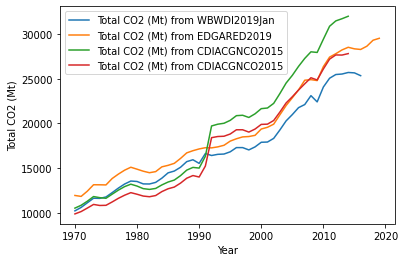

In [ ]:
for df in [df_1, df_2, df_3, df_6]:
    plt.plot(df['Year'], df.iloc[:,-1], label = df.columns[-1])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total CO2 (Mt)')

Loading stock data from snowflake 

In [ ]:
url = 'https://raw.githubusercontent.com/qixuan-code/2021_TAMU/main/stock_priceavg_data.csv'
volume_history = pd.read_csv(url,na_values='na')
url2 = 'https://raw.githubusercontent.com/qixuan-code/2021_TAMU/main/COMPANY_PROFILE.csv'
company_profile = pd.read_csv(url2,na_values='na')

In [ ]:
#merge two tables in respect to symbol
merged_table = pd.merge(volume_history,company_profile , on='SYMBOL')
merged_table1 = merged_table[merged_table['SECTOR'].notna()]
merged_table1.head()

,SYMBOL,AVG(VOLUME),AVG(OPEN),AVG(CLOSE),YEAR(DATE),ID,PRICE,BETA,VOLAVG,MKTCAP,LASTDIV,RANGE,CHANGES,COMPANYNAME,EXCHANGE,INDUSTRY,WEBSITE,DESCRIPTION,CEO,SECTOR,DCFDIFF,DCF
3,ASR,75081.679537,130.467046,130.389614,2020,3727,114.98,0.205012,68107.0,3.357094e+09,8.64972,82.08-210.38,2.66,Grupo Aeroportuario del Sureste S.A. de C.V.,New York Stock Exchange,Airports & Air Services,http://www.asur.com.mx,NaN,Mr. Adolfo Castro Rivas,Industrials,NaN,0.0
4,ASR,144194.444444,19.526942,19.543610,2005,3727,114.98,0.205012,68107.0,3.357094e+09,8.64972,82.08-210.38,2.66,Grupo Aeroportuario del Sureste S.A. de C.V.,New York Stock Exchange,Airports & Air Services,http://www.asur.com.mx,NaN,Mr. Adolfo Castro Rivas,Industrials,NaN,0.0
5,ASR,58479.761905,8.077266,8.077624,2003,3727,114.98,0.205012,68107.0,3.357094e+09,8.64972,82.08-210.38,2.66,Grupo Aeroportuario del Sureste S.A. de C.V.,New York Stock Exchange,Airports & Air Services,http://www.asur.com.mx,NaN,Mr. Adolfo Castro Rivas,Industrials,NaN,0.0
6,ASR,40111.895954,178.531272,178.655665,2021,3727,114.98,0.205012,68107.0,3.357094e+09,8.64972,82.08-210.38,2.66,Grupo Aeroportuario del Sureste S.A. de C.V.,New York Stock Exchange,Airports & Air Services,http://www.asur.com.mx,NaN,Mr. Adolfo Castro Rivas,Industrials,NaN,0.0
7,ASR,64134.920635,160.507909,160.732672,2019,3727,114.98,0.205012,68107.0,3.357094e+09,8.64972,82.08-210.38,2.66,Grupo Aeroportuario del Sureste S.A. de C.V.,New York Stock Exchange,Airports & Air Services,http://www.asur.com.mx,NaN,Mr. Adolfo Castro Rivas,Industrials,NaN,0.0


SUM_Volume_per_year

In [ ]:
#calculate total volume in respect to different sectors and years
columns = ['AVG(VOLUME)','YEAR(DATE)','SECTOR']
year_volume = merged_table1[columns]
#Total_year_Volume =  pd.pivot_table(year_volume, index=["YEAR(DATE)"], columns=["SECTOR"], values=["AVG(VOLUME)"], aggfunc=np.sum)
Total_year_Volume = pd.crosstab(year_volume['YEAR(DATE)'],year_volume['SECTOR'], values = year_volume['AVG(VOLUME)'], aggfunc = 'sum')
Total_year_Volume.reset_index(inplace=True)

In [ ]:
year_volume

,AVG(VOLUME),YEAR(DATE),SECTOR
3,75081.679537,2020,Industrials
4,144194.444444,2005,Industrials
5,58479.761905,2003,Industrials
6,40111.895954,2021,Industrials
7,64134.920635,2019,Industrials
...,...,...,...
165712,7251.330396,2020,Financial Services
165713,24015.266055,2019,Industrials
165717,53617.000000,2019,Industrials
165718,150.000000,2019,Industrials


Correlate df_2(EDG mt CO2) with total volume per year

In [ ]:
a = pd.merge(df_1,Total_year_Volume, left_on='Year', right_on='YEAR(DATE)')

NameError: ignored

In [ ]:
del a['YEAR(DATE)']

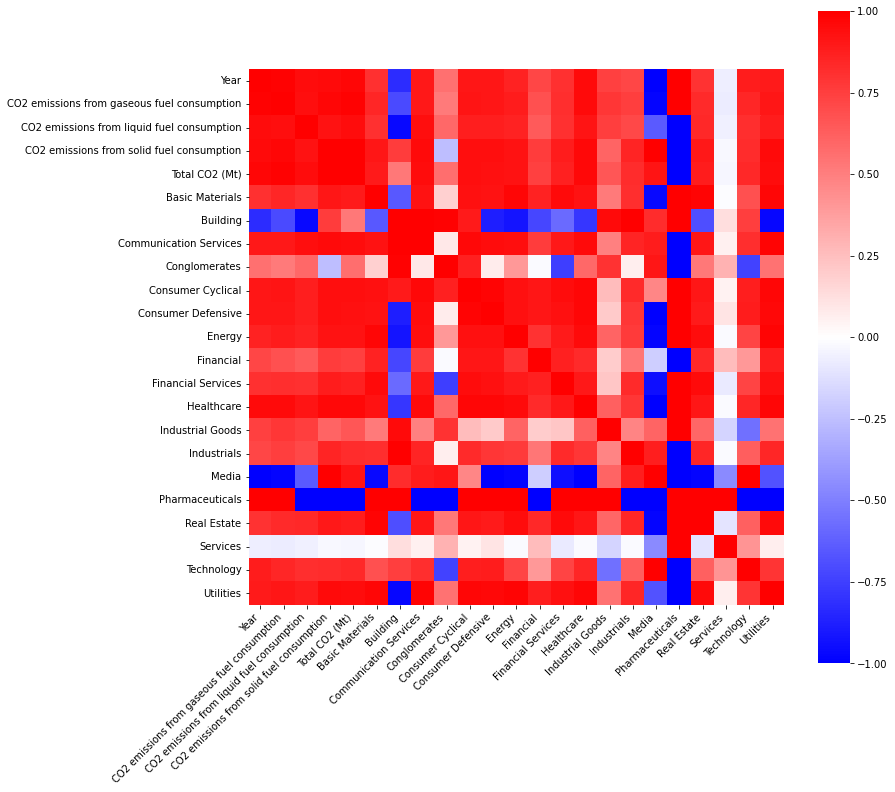

In [ ]:
corr = a.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, cmap = 'bwr',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.show()

In [ ]:
a.columns

Index(['Year', 'CO2 emissions from gaseous fuel consumption',
       'CO2 emissions from liquid fuel consumption',
       'CO2 emissions from solid fuel consumption', 'Total CO2 (Mt)',
       'Basic Materials', 'Building', 'Communication Services',
       'Conglomerates', 'Consumer Cyclical', 'Consumer Defensive', 'Energy',
       'Financial', 'Financial Services', 'Healthcare', 'Industrial Goods',
       'Industrials', 'Media', 'Pharmaceuticals', 'Real Estate', 'Services',
       'Technology', 'Utilities'],
      dtype='object')

In [ ]:
feature_selection = ['Year', 'CO2 emissions from gaseous fuel consumption',
       'CO2 emissions from liquid fuel consumption',
       'CO2 emissions from solid fuel consumption', 'Total CO2 (Mt)','Financial Services']
a = a[feature_selection]

model_training 

In [ ]:
a.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
target_value = 'Financial Services'
y = a[target_value]
X = a.drop(columns = target_value)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression().fit(X_train, y_train)
w = linreg.coef_
b = linreg.intercept_
print(w,b)
linreg.score(X_train,y_train)

[-2.90263676e+07 -1.63544721e+04 -6.90938424e+04  1.53828363e+05
  6.83800489e+04] 56140500765.18223


0.9141702175188924

In [ ]:
linreg.score(X_test,y_test)

0.4802342079284314

In [ ]:
def plot_target_and_prediction(reg, X_test, y_test):
    import matplotlib.pyplot as plt
    y_test_pred = reg.predict(X_test)
    plt.scatter(y_test, y_test_pred, marker= 'o')
    plt.plot(y_test, y_test, 'r-')
    plt.title('R2 ={}'.format(reg.score(X_test, y_test)))
    plt.xlabel('Target total volume per year')
    plt.ylabel('Predicted total volume per year')
    plt.tight_layout()
    plt.show()

0.9900940896612864
0.6721670412781965
106094164.37067272


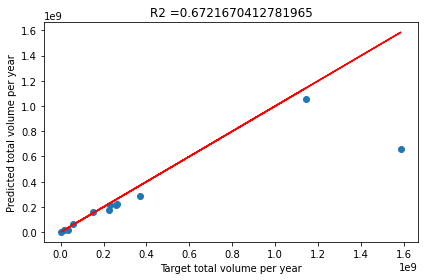

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rf_reg = RandomForestRegressor(max_features = 3, random_state=0).fit(X_train, y_train)
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))
print(mean_absolute_error(rf_reg.predict(X_test), y_test))
plot_target_and_prediction(rf_reg, X_test, y_test)